In [63]:
import sys
sys.path.append('C:/Users/jangj/anaconda3/envs/tf/Lib/site-packages')
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import load_model

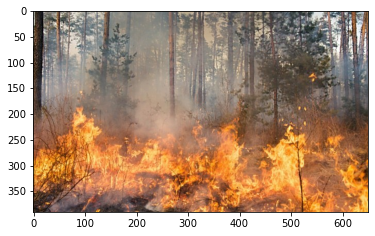

In [64]:
im = cv2.imread('fire_dataset/fire/fire.159.png')
#im = cv2.imread('fire_dataset/non_fire_images/non_fire.953.png')
im_cvt = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#이미지 출력
plt.imshow(im_cvt)
plt.show()

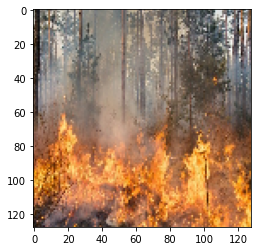

In [65]:
# resize : 이미지 크기 변환
    # 1) 변환할 이미지
    # 2) 변환할 이미지 크기(가로, 세로)
    # - interpolation : 보간법 지정
    #   - 보간법 : 알려진 데이터 지점 내에서 새로운 데이터 지점을 구성하는 방식
    #   - cv2.INTER_NEAREST : 최근방 이웃 보간법
    #   - cv2.INTER_LINEAR(default) : 양선형 보간법(2x2 이웃 픽셀 참조)
    #   - cv2.INTER_CUBIC : 3차 회선 보간법(4x4 이웃 픽셀 참조)
    #   - cv2.INTER_LANCZOS4 : Lanczos 보간법(8x8 이웃 픽셀 참조)
    #   - cv2.INTER_AREA : 픽셀 영역 관계를 이용한 resampling 방법으로 이미지 축소시 효과적
im_res = cv2.resize(im_cvt, (128,128), interpolation=cv2.INTER_LANCZOS4) #사이즈 조정
im_res = cv2.GaussianBlur(im_res,(1,1),0)
plt.imshow(im_res)
plt.show()

In [66]:
im_arr = im_res.reshape(-1,128,128,3) / 255
#print(im_arr)

In [67]:
model = load_model('save/model-fire-whole.h5')

In [68]:
labels = ["fire","non_fire",]

In [69]:
r = model.predict(im_arr, batch_size=64, verbose=1)
#r
res = r[0]
print(res)

1/1 [==============================] - 0s 132ms/step
[0.39642534 0.60357463]


In [70]:
print(res[0]) #fire img percent

0.39642534


In [71]:
print(res[1]) #non_fire img percent

0.60357463


In [72]:
for i, acc in enumerate(res) :
    print(labels[i], "=", int(acc*100))
print("---")
print("예측한 결과 = " , labels[res.argmax()])

fire = 39
non_fire = 60
---
예측한 결과 =  non_fire
